# In this project, it is intended to develop a model that predict the housing price. 

# The data contains the following variables: Average Income by Area, Average House Age by Area,  Average Number of Rooms by Area, Average Number of Bedrooms by Area,  Population by Area, Price, and Address.

# Let us explore the data using python 3

In [162]:
# First, import pandas and numpy libraries for data manipulation.
# The data manipulation capabilities of pandas are built on top of the numpy library. 
# Pandas is best at handling tabular data sets comprising different variable types (integer, float, double, etc.)
# Numpy is most suitable for performing basic numerical computations such as mean, median, range, etc. 
#Alongside, numpy also supports the creation of multi-dimensional arrays.

In [161]:
import pandas as pd
import numpy as np

In [162]:
# matplotlib.pyplot is a collection of command style functions that make plotting and data visualization. 
# Data visualization is very important to determine the relationship between variables.
# Seaborn is a Python data visualization library based on matplotlib.

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
% matplotlib inline

In [165]:
# load data to explore and prepare for preprocessing, for visualization, and further analysis.
# The data was saved in csv file and pd.read_csv function is used to open the data file.

In [166]:
df = pd.read_csv('USA_Housing.csv')

In [167]:
# Check the head of data frame
# The head() function displays the first five lines of the data and 
#this helps to understand what the content of the data table is.

In [168]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [170]:
# Let us explore the statistics of the entire data
# The length, the mean, the standard deviation, the minimum, and the maximum of each numberical variable.

In [171]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [172]:
# Let us look at the correlation coefficients of every pair of variables. 

In [173]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [141]:
 # Train and test split - split traing and testing data.
# Training data, also called AI training data, training set, training dataset, or learning set.
# Training data is the information used to train an algorithm, to learn and produce complex results, 
# so that it can make accurate decisions when later presented with new data. 
# The training data includes both input data and the corresponding expected output. 
# The testing data is used to assess how well your algorithm was trained, and to estimate model properties.

In [142]:
# Import train_test_split function from sklearn library

In [178]:
from sklearn.cross_validation import train_test_split

In [179]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [180]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
             'Avg. Area Number of Bedrooms', 'Area Population']]
#X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]

y = df['Price']

In [181]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 101)

In [182]:
# Let us choose linear regression model. 
# If the distribution of the residuals is normal distribution then the our choice of linear regression model is appropraite. 

# Linear Regression model

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
# Instantiate the linear regression as lm

In [185]:
lm = LinearRegression()

In [186]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [187]:
print(lm.intercept_)

-2640159.796851911


In [188]:
predictions = lm.predict(X_test)

In [189]:
# Print out the coefficients of the model

In [190]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [438]:
predictors = X_train.columns

In [439]:
lm_coef = pd.Series(lm.coef_,predictors).sort_values()

Text(0,0.5,'Coefficients')

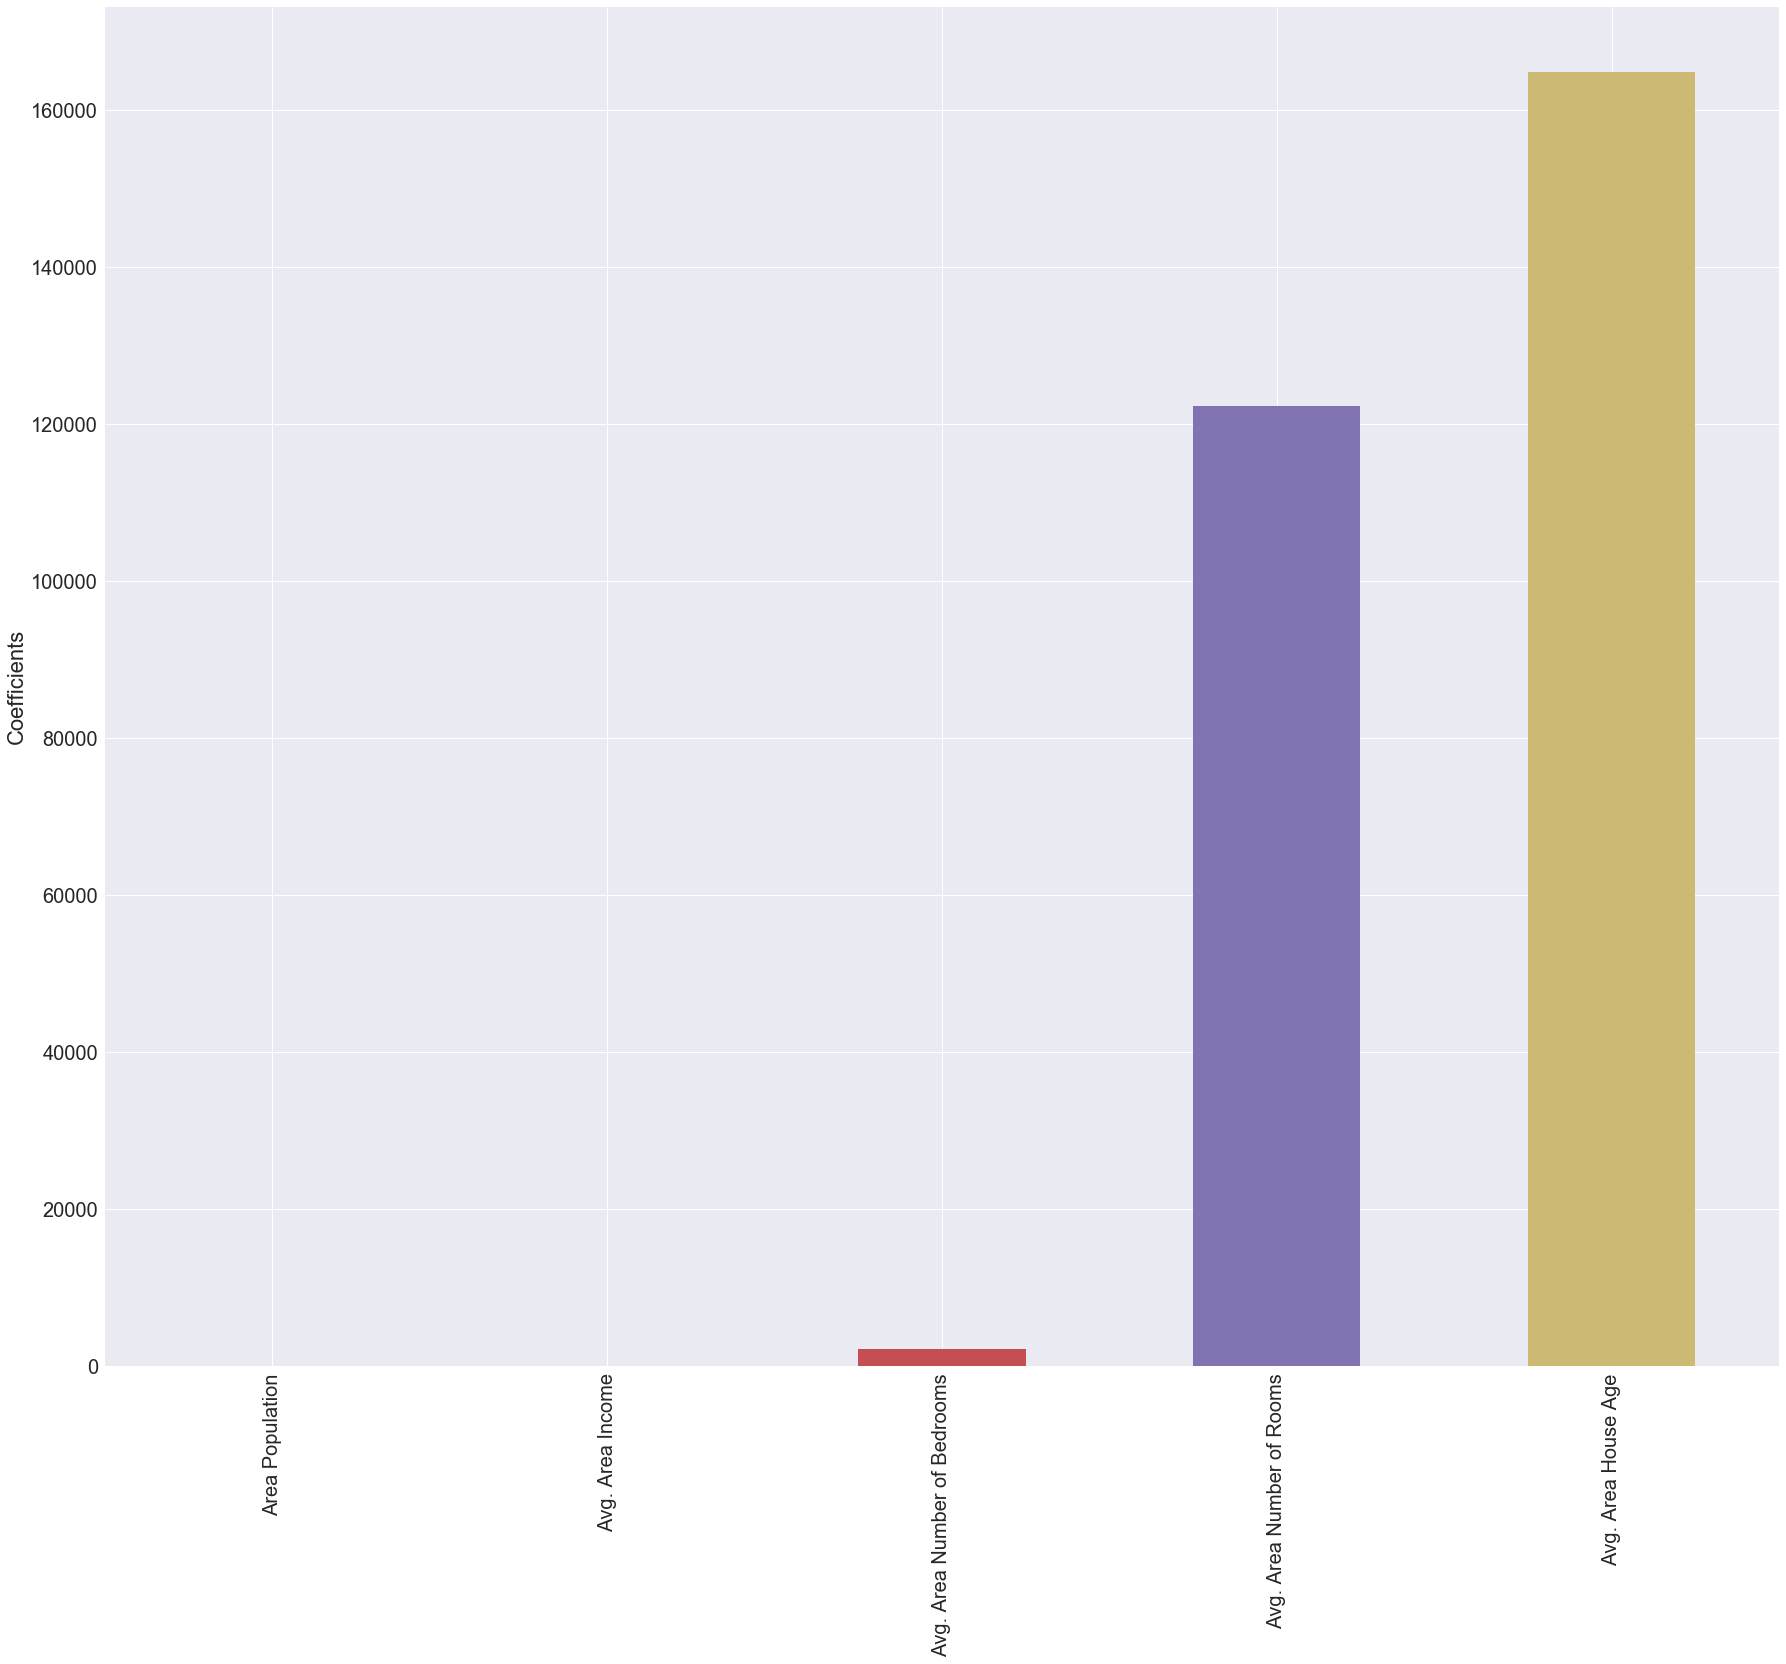

In [442]:
lm_coef.plot(kind='bar')
plt.ylabel('Coefficients')

In [443]:
cdf_lm = pd.DataFrame(lm.coef_, X.columns, columns =['Linear Coeff'])

In [444]:
cdf_lm

,Linear Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [445]:
from sklearn import metrics

In [446]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914957

In [447]:
mse_lm = metrics.mean_squared_error(y_test,predictions)

In [448]:
mse_lm

10460958907.209507

In [449]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922291156

In [450]:
metrics.explained_variance_score(y_test,predictions)

0.9178179926151797

Text(0,0.5,'Predicted values')

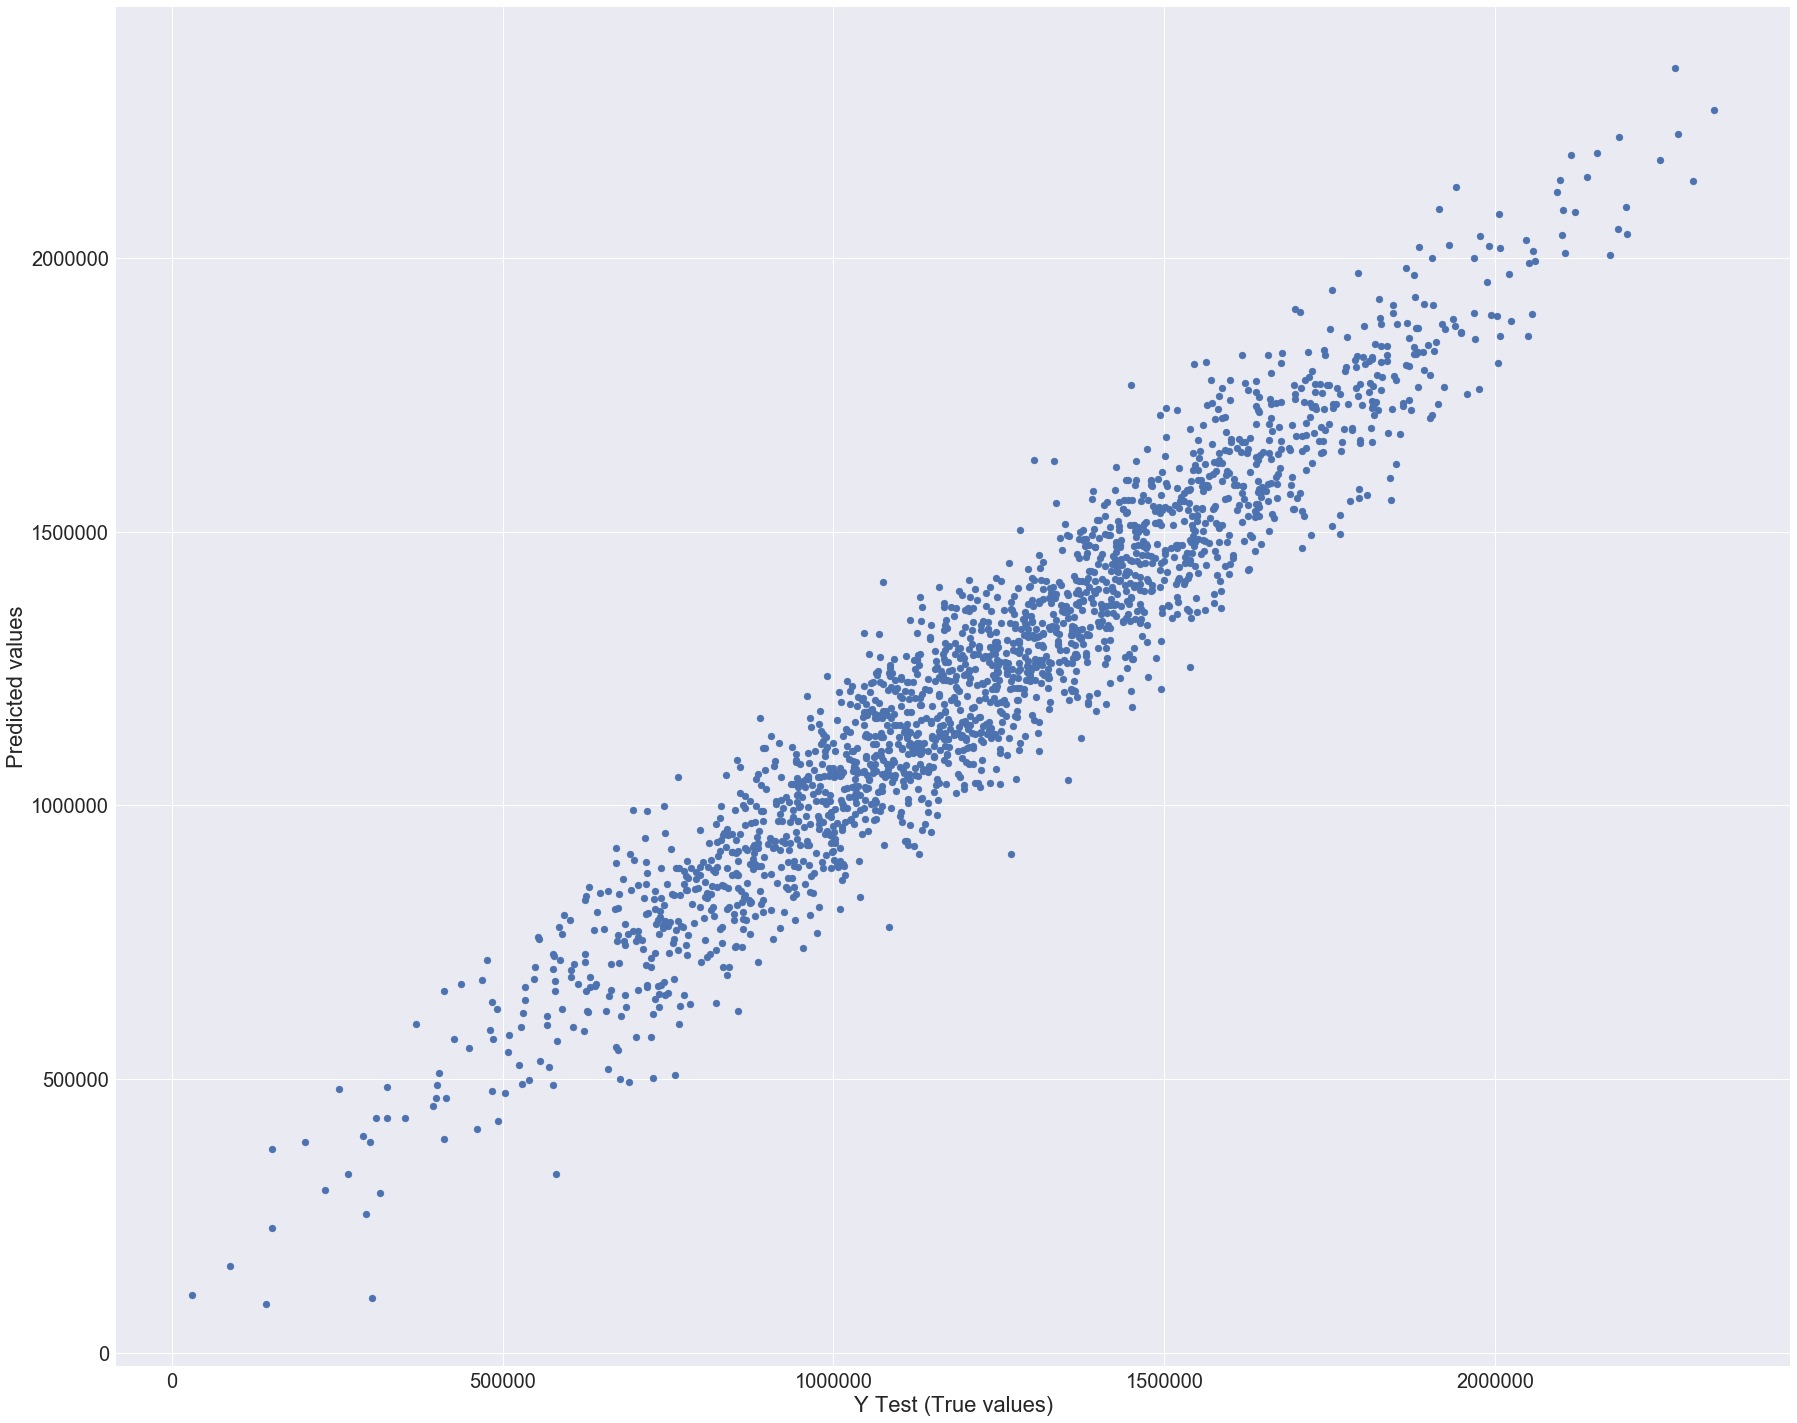

In [451]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')

# Ridge regression 
Ridge regression reduces model complexity and prevent over-fitting which may result from simple linear regression.
This model shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

In [452]:
from sklearn.linear_model import Ridge

In [453]:
# Training model 

In [454]:
ridgeReg = Ridge(alpha=0.01, normalize=True)

In [455]:
ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [456]:
pred = ridgeReg.predict(X_test)

In [457]:
# Calculating mse

In [458]:
from sklearn import metrics

In [459]:
metrics.mean_absolute_error(y_test, pred)

82325.65791278714

In [460]:
mse_ridge = metrics.mean_squared_error(y_test,pred)

In [461]:
mse_ridge

10477521756.659378

In [462]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

102359.76629838199

In [463]:
metrics.explained_variance_score(y_test,pred)

0.9176798056541966

In [464]:
ridgeReg.coef_

array([2.13100482e+01, 1.63216861e+05, 1.20794083e+05, 2.78299405e+03,
       1.49979677e+01])

In [465]:
cdf_ridge = pd.DataFrame(ridgeReg.coef_, X.columns, columns =['Ridge Coeff'])

In [466]:
cdf_ridge

,Ridge Coeff
Avg. Area Income,21.310048
Avg. Area House Age,163216.860894
Avg. Area Number of Rooms,120794.083333
Avg. Area Number of Bedrooms,2782.994053
Area Population,14.997968


In [467]:
# Checking the magnitude of coefficients

In [468]:
predictors = X_train.columns

In [469]:
ridge_coef = pd.Series(ridgeReg.coef_,predictors).sort_values()

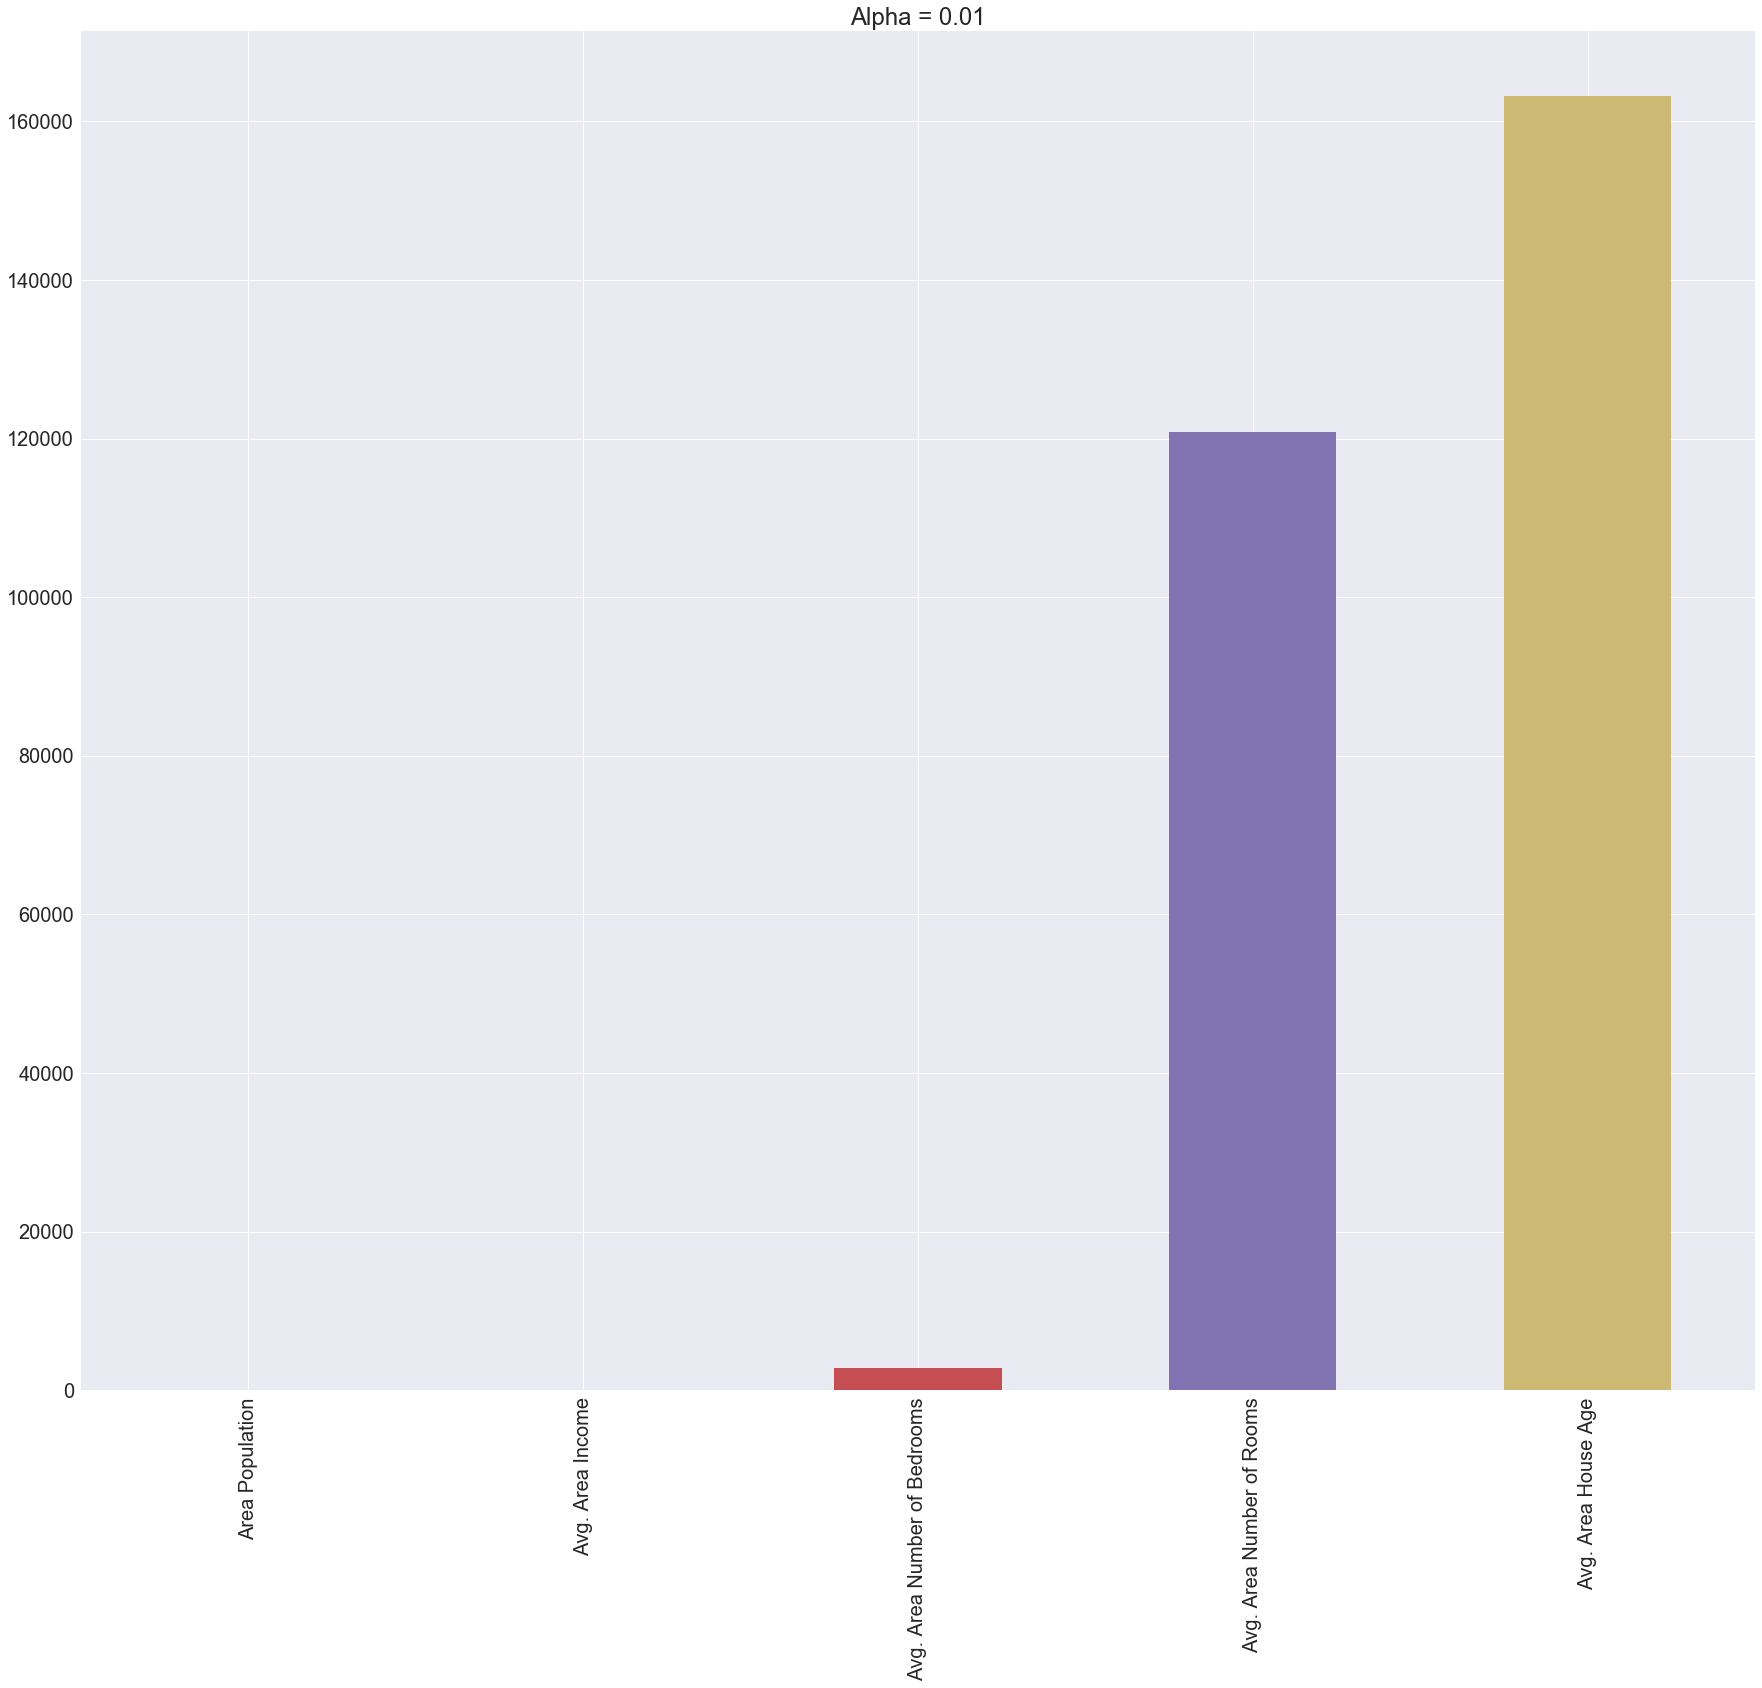

In [470]:
ridge_coef.plot(kind='bar', title='Alpha = 0.01')

Text(0,0.5,'Predicted values')

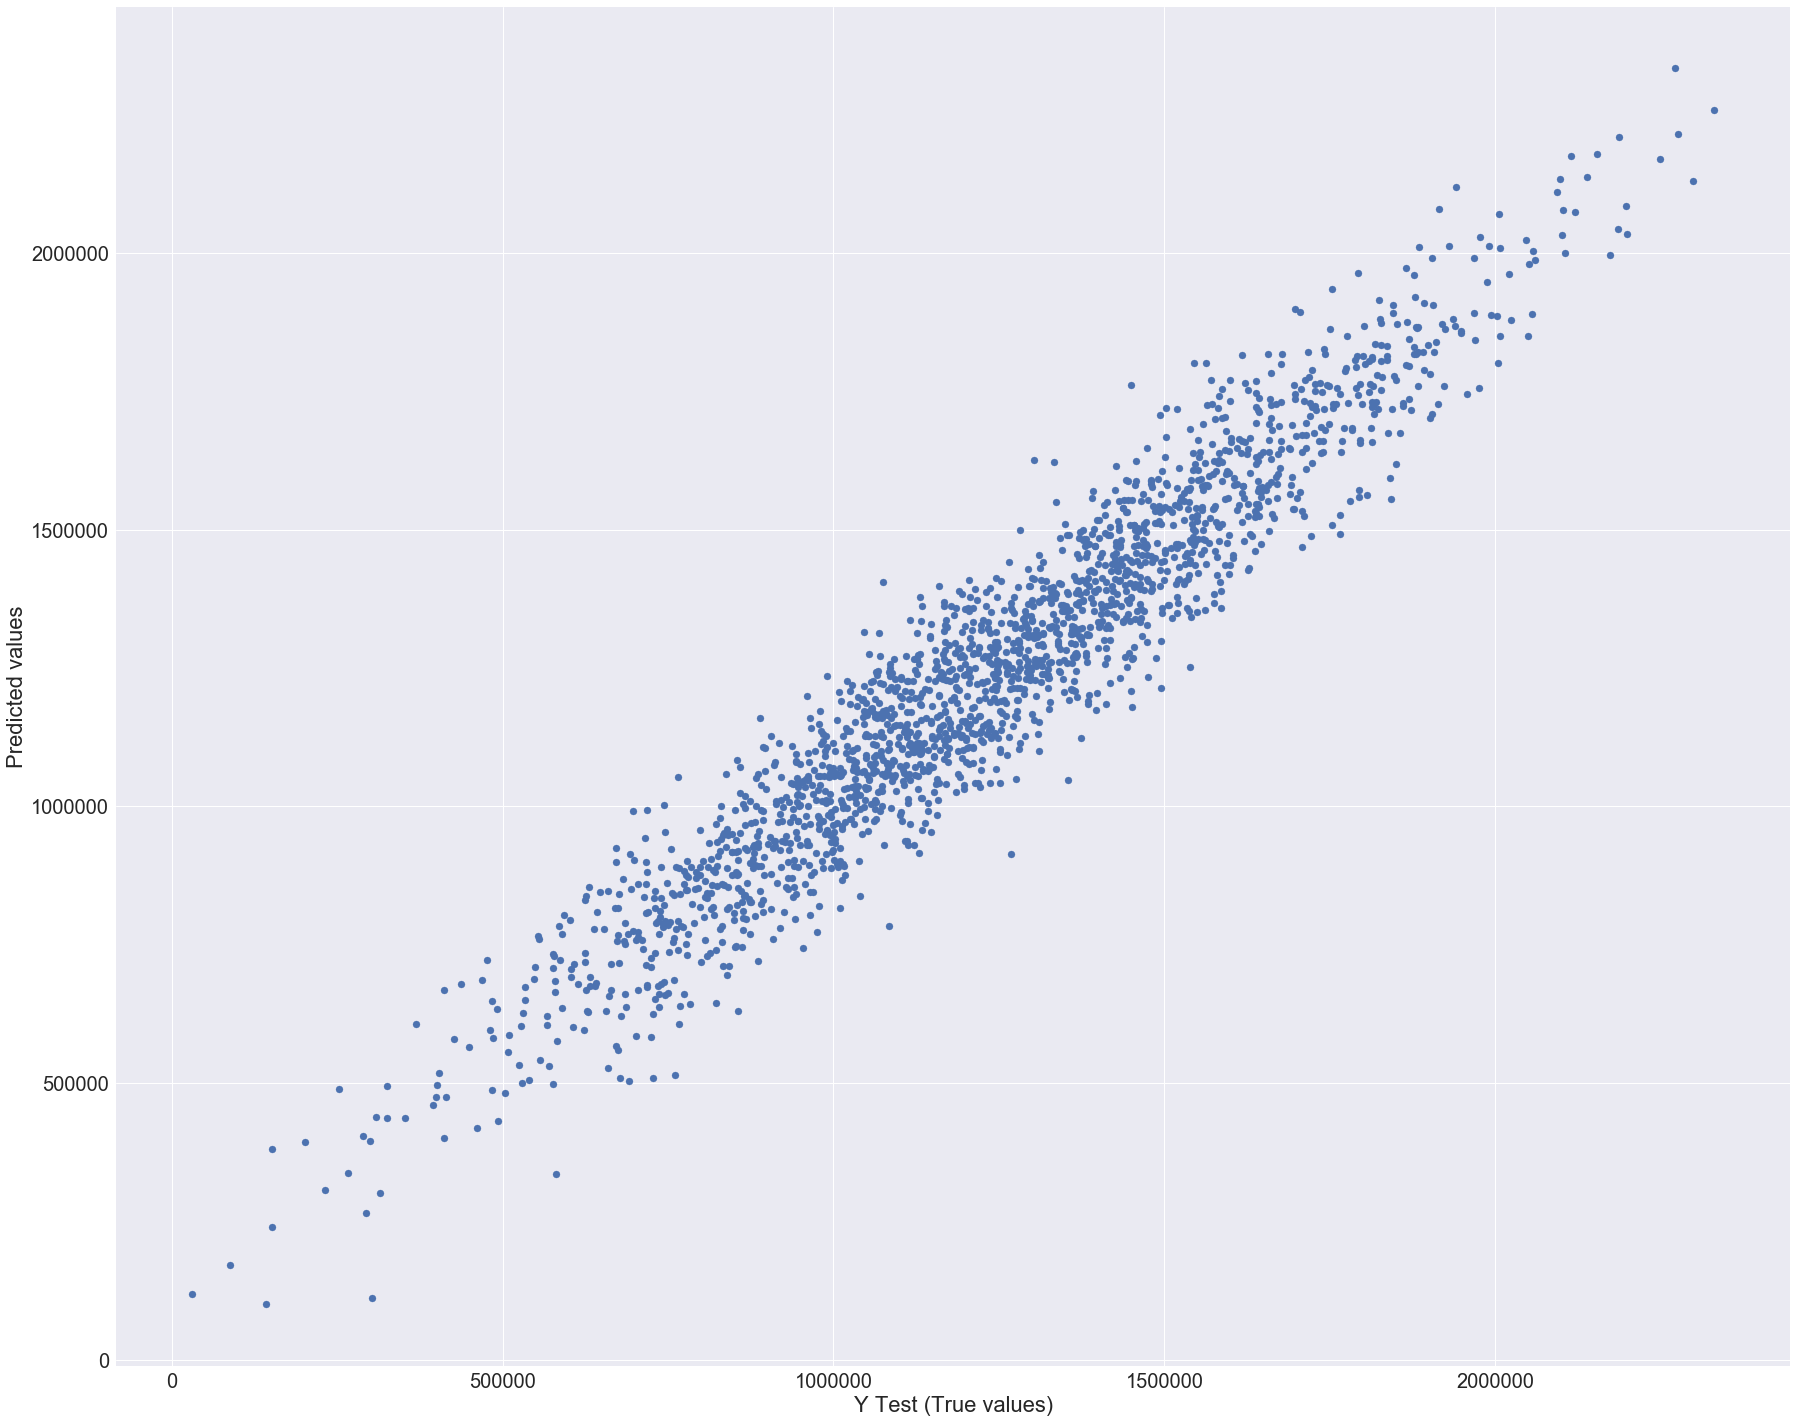

In [471]:
plt.scatter(y_test, pred)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')

# Lasso (Least Absolute Shrinkage and Selection Operator) regression regression
Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.


In [472]:
from sklearn.linear_model import Lasso

In [473]:
lassoReg = Lasso(alpha=7, normalize=True)

In [474]:
lassoReg.fit(X_train,y_train)

Lasso(alpha=7, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [475]:
predLasso = lassoReg.predict(X_test)

In [476]:
metrics.mean_absolute_error(y_test, predLasso)

82272.5177214421

In [477]:
mse_lasso = metrics.mean_squared_error(y_test,predLasso)

In [478]:
mse_lasso

10460238085.286568

In [479]:
np.sqrt(metrics.mean_squared_error(y_test,predLasso))

102275.3053541595

In [480]:
metrics.explained_variance_score(y_test,predLasso)

0.9178216676683224

In [481]:
lassoReg.coef_

array([2.14905839e+01, 1.64490959e+05, 1.22101381e+05, 2.02022320e+03,
       1.51107965e+01])

In [482]:
cdf_lasso = pd.DataFrame(lassoReg.coef_, X.columns, columns =['Lasso Coeff'])

In [483]:
cdf_lasso

,Lasso Coeff
Avg. Area Income,21.490584
Avg. Area House Age,164490.959401
Avg. Area Number of Rooms,122101.380724
Avg. Area Number of Bedrooms,2020.223204
Area Population,15.110796


In [484]:
Lasso_coef = pd.Series(lassoReg.coef_,predictors).sort_values()

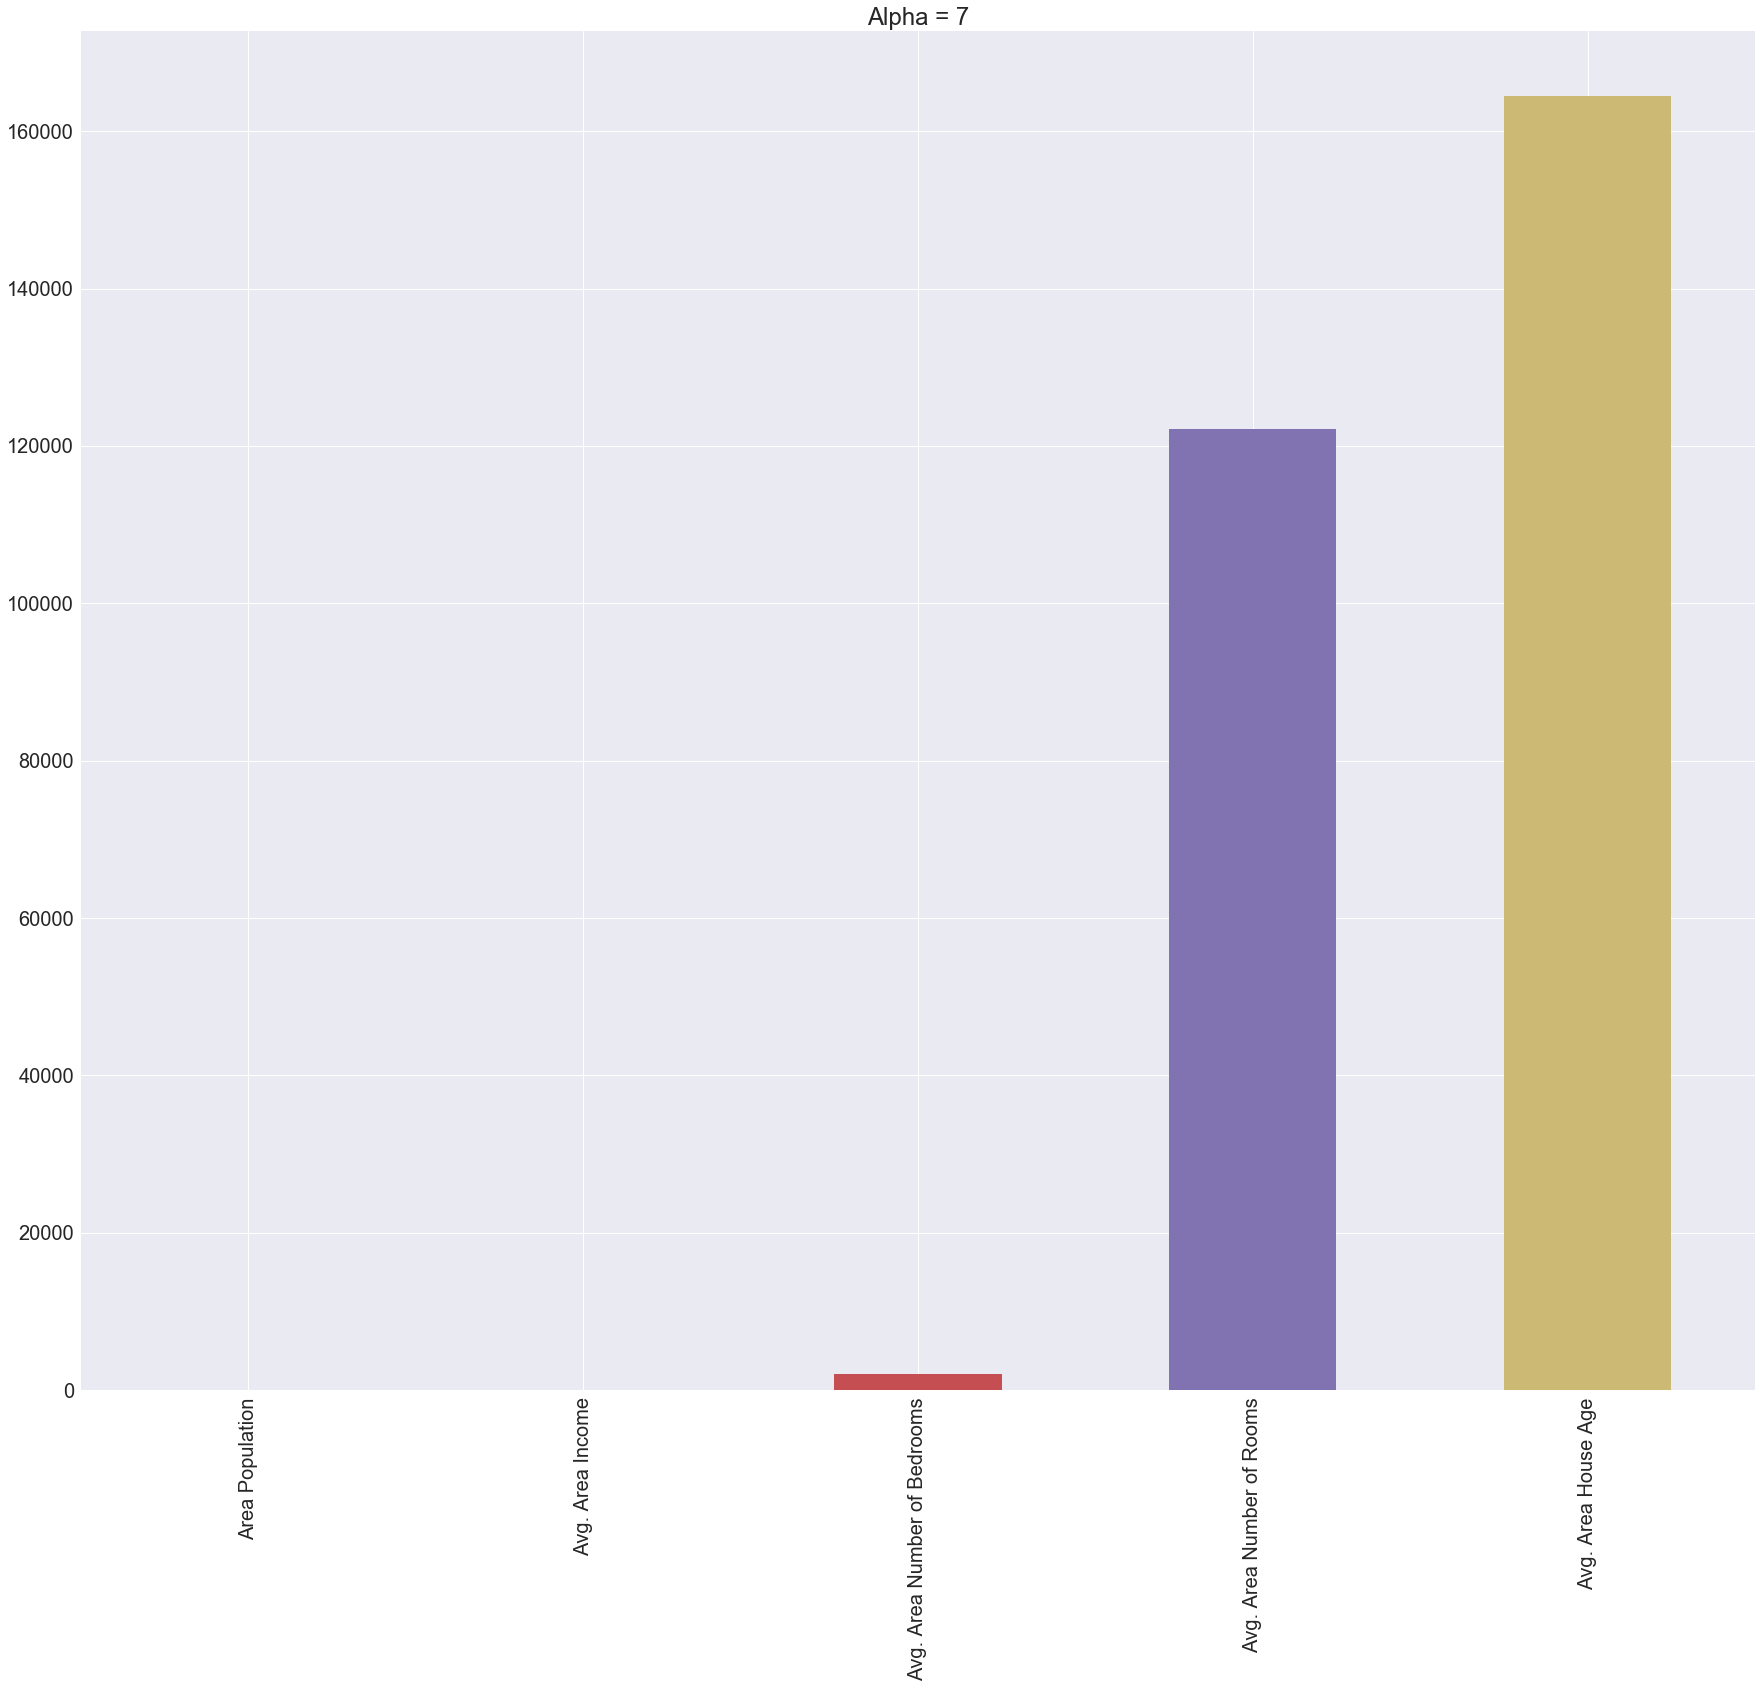

In [485]:
Lasso_coef.plot(kind='bar', title='Alpha = 7')

Text(0,0.5,'Predicted values')

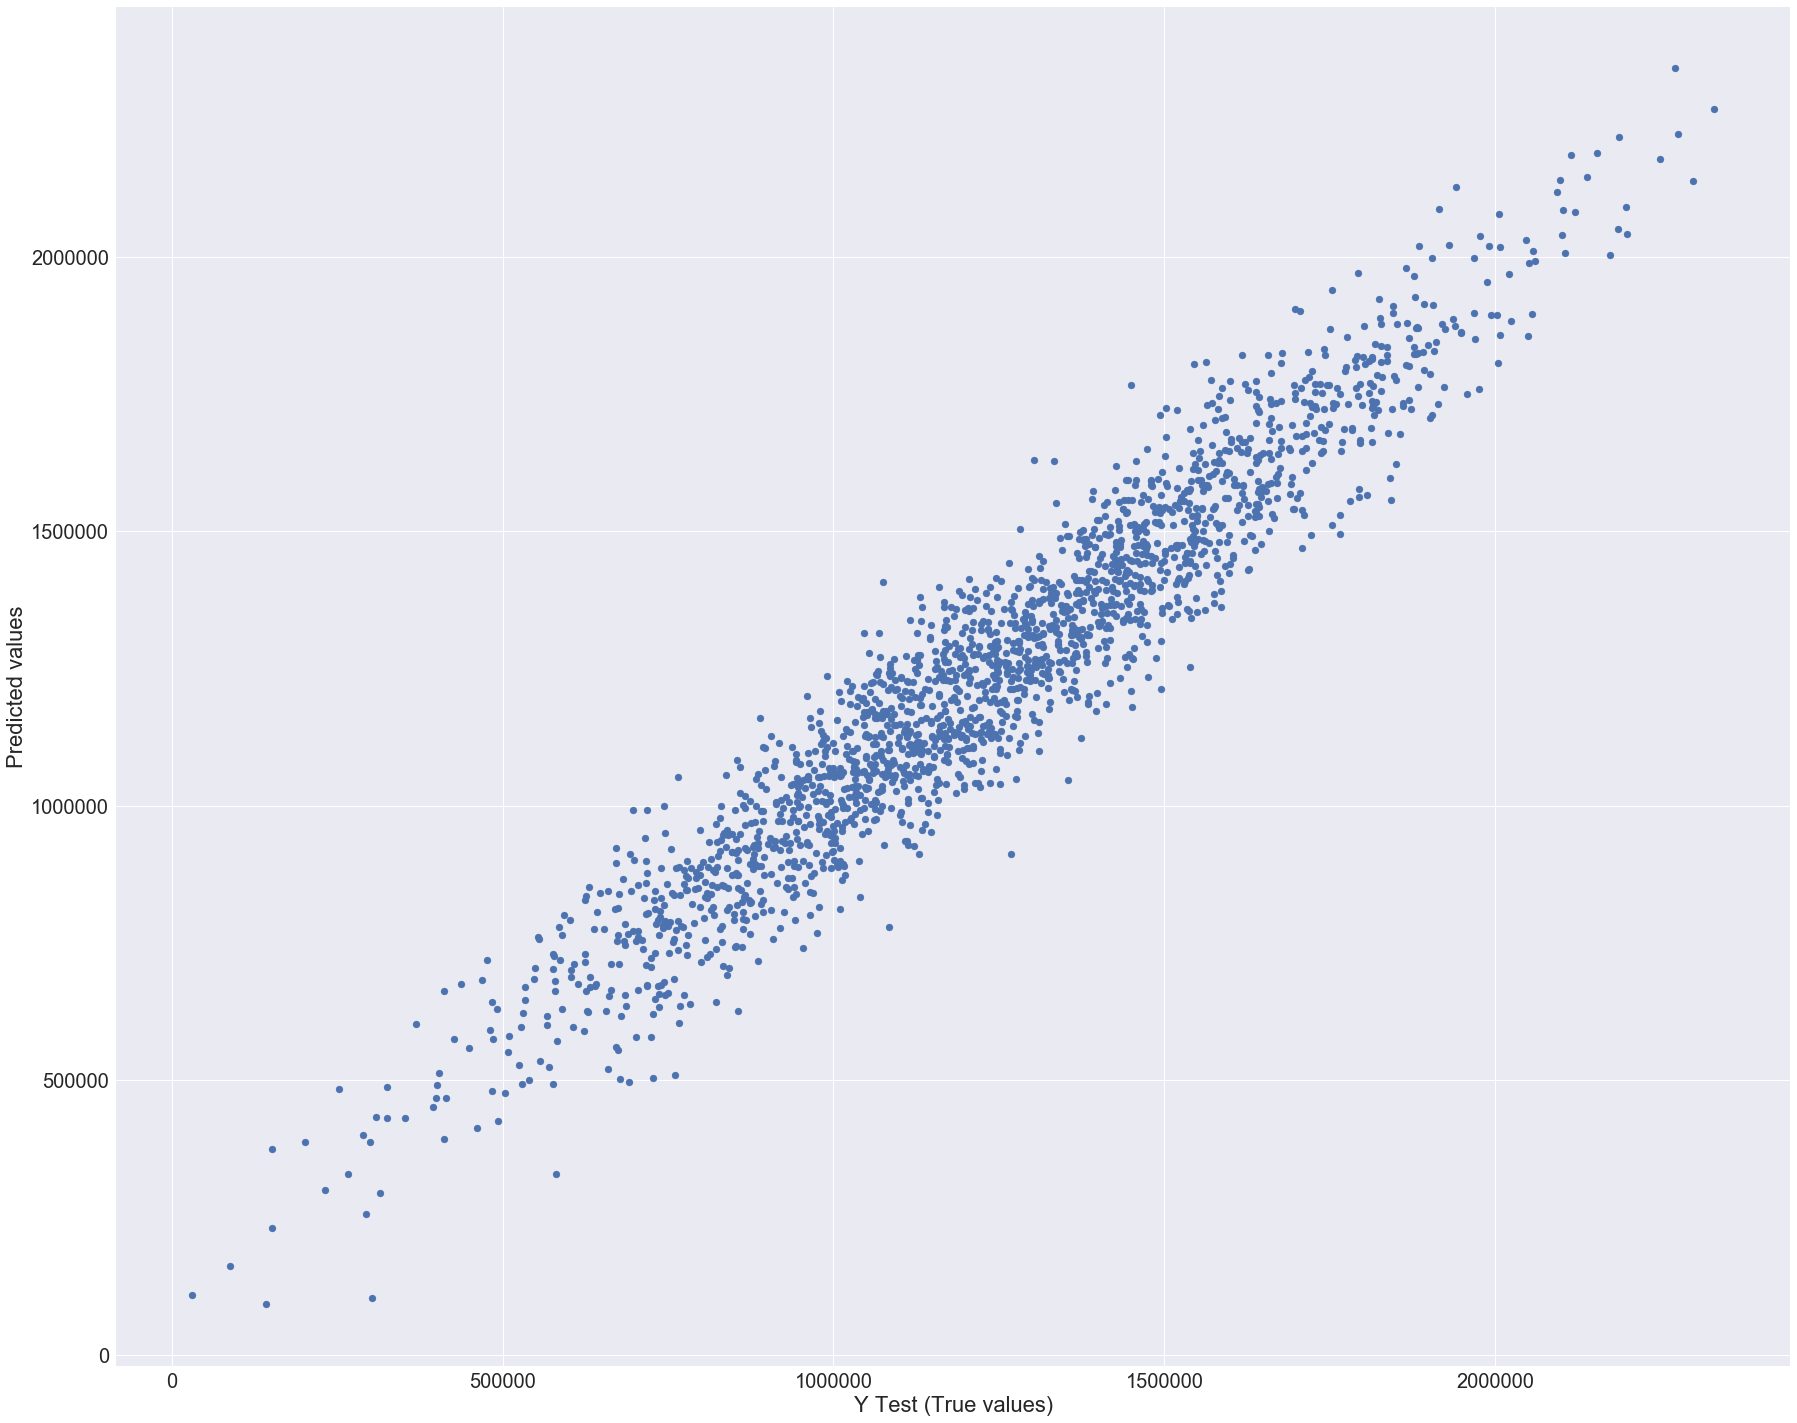

In [486]:
plt.scatter(y_test, predLasso)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')

In [487]:
# Comparison of mean square errors of the three models

In [488]:
MDLS=['Linear Regression', 'Ridge Regression', 'Lasso Regression']

In [489]:
mses = [mse_lm, mse_ridge, mse_lasso]

In [490]:
mses_comparison=pd.Series(mses,MDLS)

(10460000000.0, 10478000000.0)

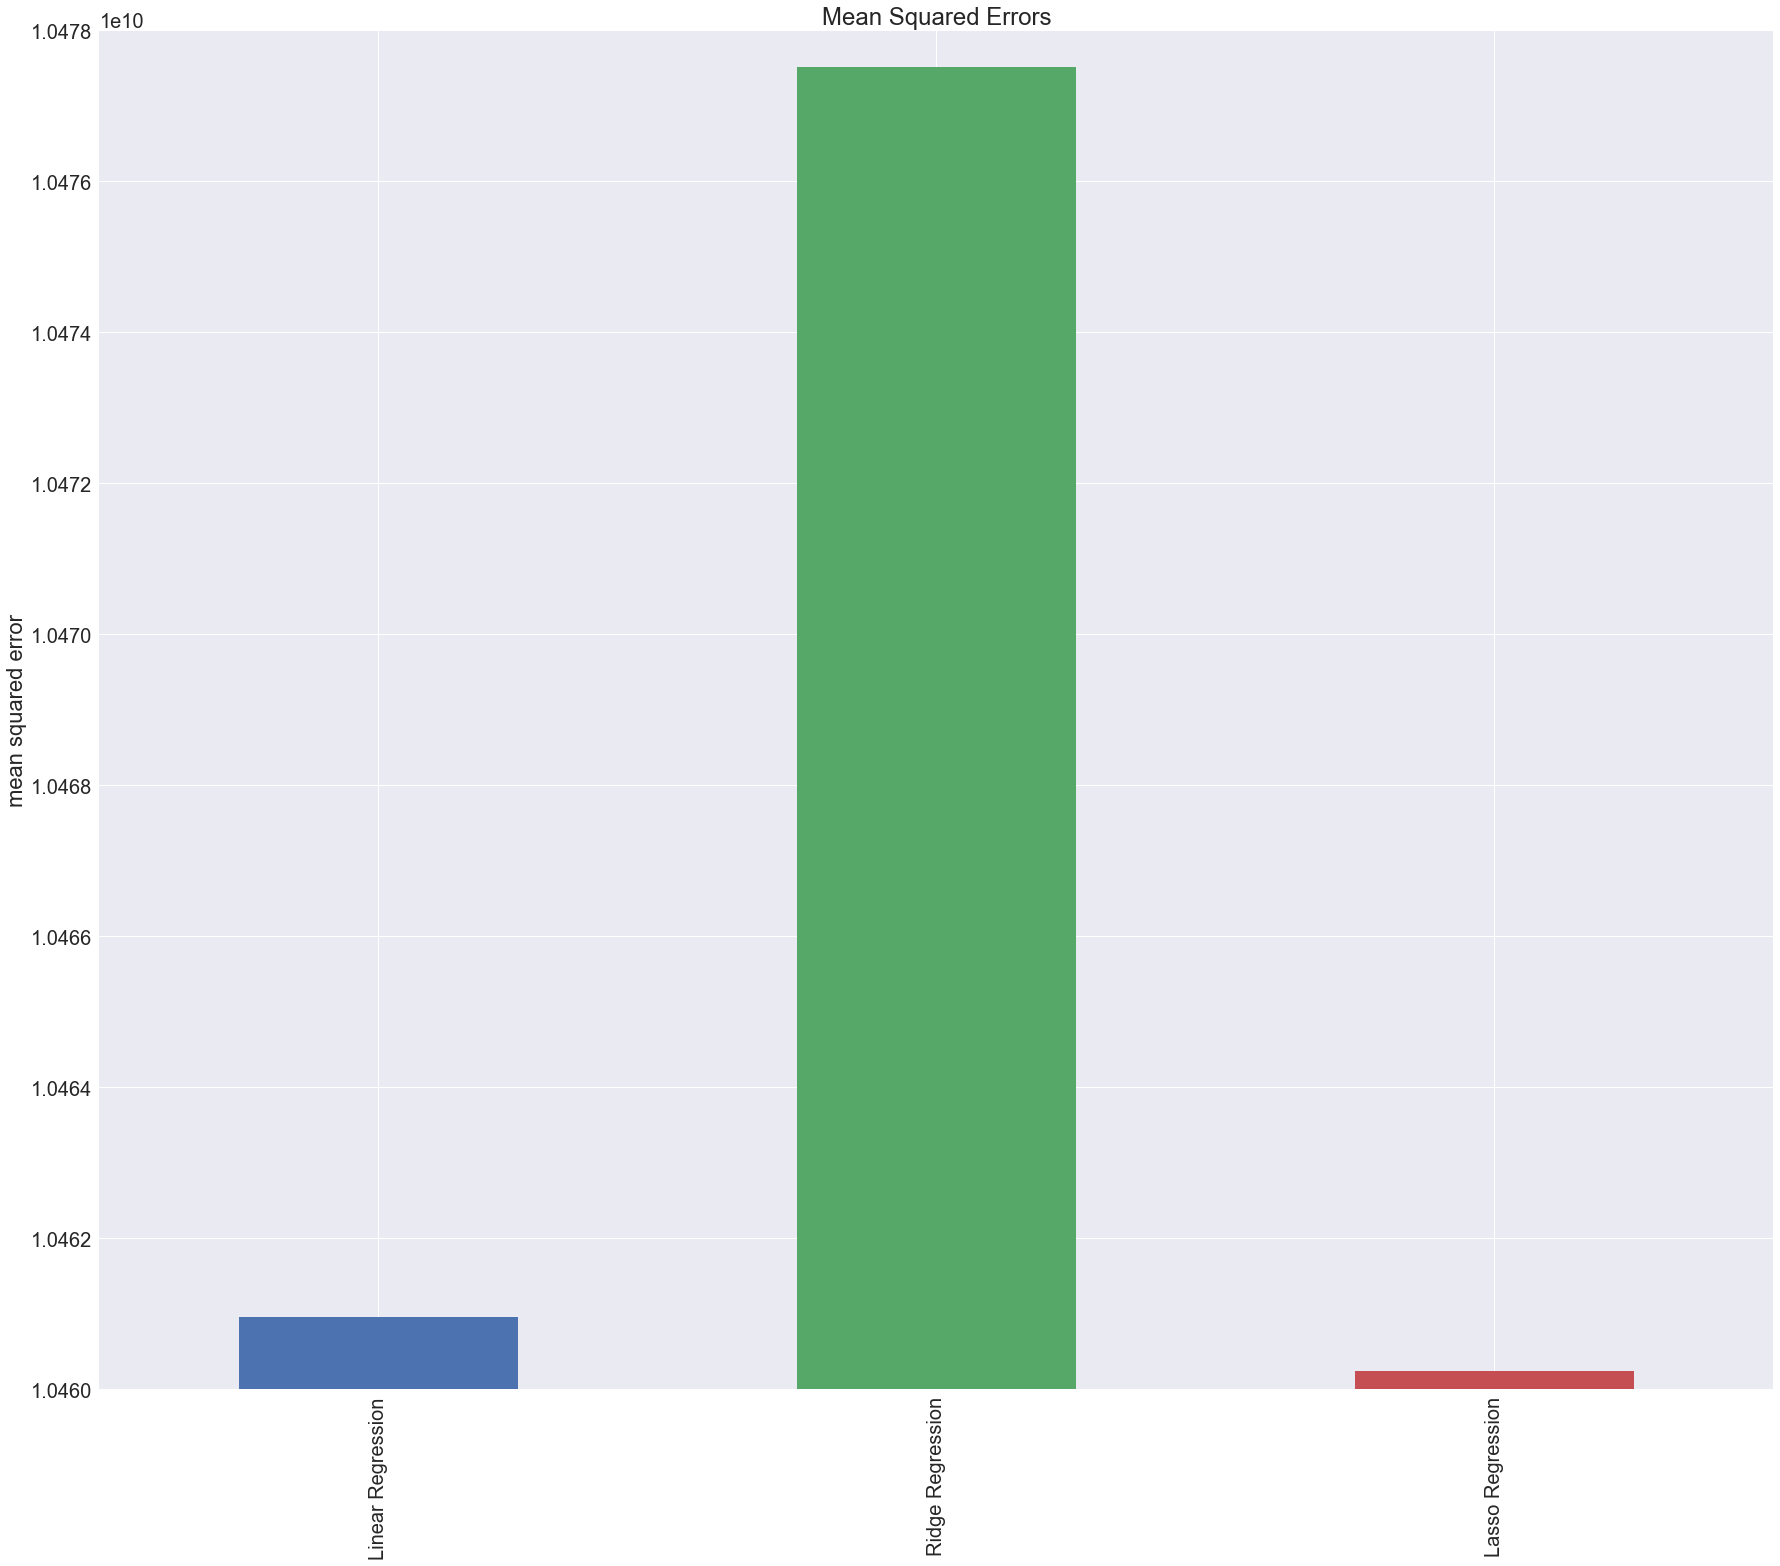

In [491]:
mses_comparison.plot(kind='bar',title='Mean Squared Errors')
plt.ylabel('mean squared error')
plt.ylim(1.046e10,1.0478e10)

# Result 

In [492]:
# Lasso regression give smaller mean squared error compared to linear and ridge regressions.

#The best model to predict the housing price is give as: 
# Price = 21.490584*(Avg. Area Income) + 164490.959401*(Avg. Area House Age) + 122101.380724*(Avg. Area Number of Rooms) + 2020.223204(Avg. Area Number of Bedrooms) + 15.110796*(Area Population)
